In [5]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust
import scipy.stats as stats

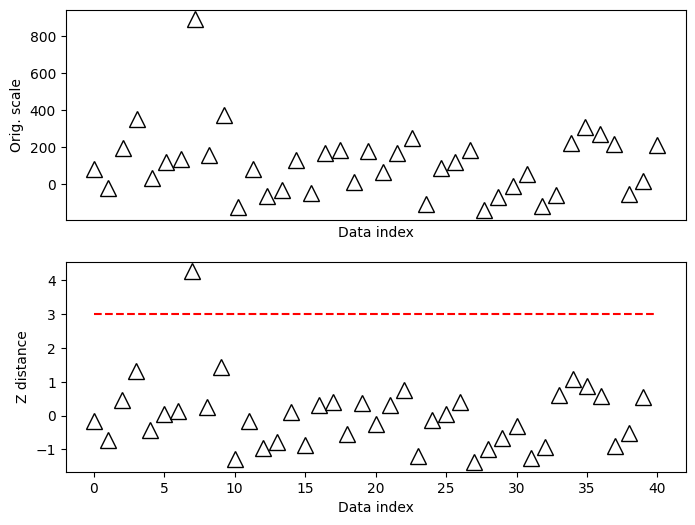

In [15]:
## create some data

N = 40
data = np.random.randn(N)
data[data<-1] = data[data<-1]+2
data[data>2] = data[data>2]**2 #try to force a few outliers
data = data*200 + 50 # change the scale for comparison with z

# convert to z
dataZ = (data-np.mean(data))/np.std(data)

#### specify the z-score threshold
zscorethresh = 3

# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Orig. scale')

# then plot the zscores
ax[1].plot(dataZ,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Z distance')
plt.show()

         

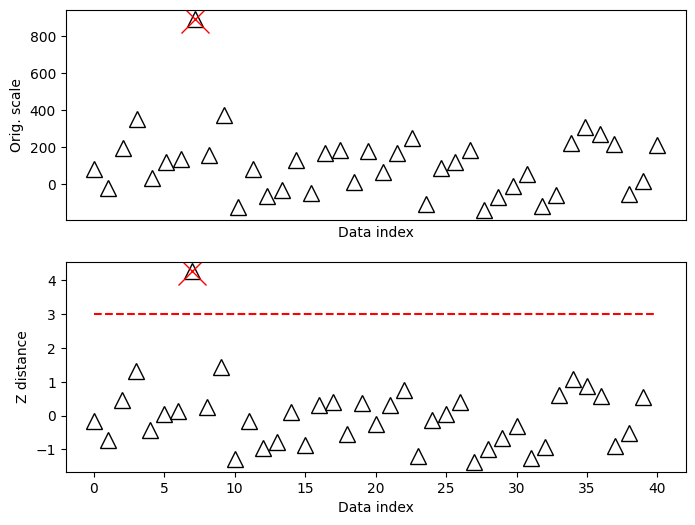

In [16]:
## identify outliers

# find 'em'
outliers = np.where(abs(dataZ)>zscorethresh)

# and cross those out
ax[0].plot(outliers,data[outliers],'x',color='r',markersize=20)
ax[1].plot(outliers,dataZ[outliers],'x',color='r',markersize=20)

fig

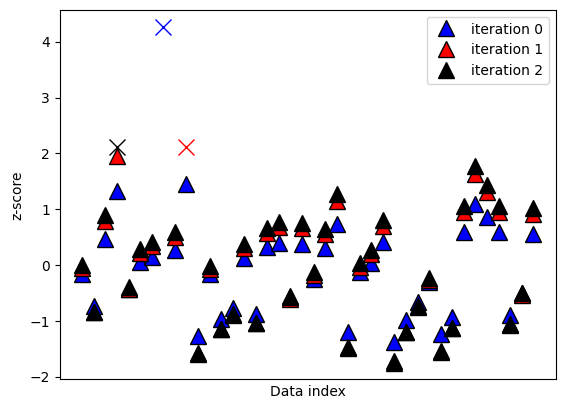

[3 7 9]


In [17]:
## iterative method

# pick a lenient threshold just for illustration
zscorethresh = 2
dataZ = (data-np.mean(data))/np.std(data)

colorz = 'brkm'
numiters = 0 #iteration counter
while True:

    # convert to z
    datamean = np.nanmean(dataZ)
    datastd = np.nanstd(dataZ)
    dataZ = (dataZ-datamean)/datastd

    # find data values to remove
    toremove = np.abs(dataZ)>zscorethresh

    # break out of while loop if no points to remove
    if sum(toremove)==0:
        break
    else:
        # otherwise, mark the outliers in the plot
        plt.plot(np.where(toremove)[0],dataZ[toremove],'%sx'%colorz[numiters],markersize=12)
        dataZ[toremove] = np.nan

    #
    plt.plot(dataZ,'k^',markersize=12,markerfacecolor=colorz[numiters],label='iteration %g'%numiters)
    numiters = numiters + 1

plt.xticks([])
plt.ylabel('z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()

#### the data points to be removed
removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

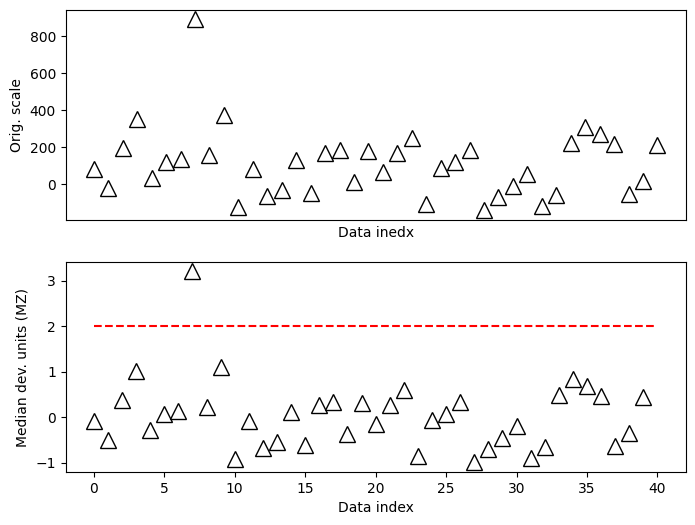

In [20]:
## modified Z for non-normal distribution

# compute modified z
dataMed = np.median(data)
dataMAD = robust.mad(data)

dataMz = stats.norm.ppf(.75)*(data-dataMed)/dataMAD

# plot the data
fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data,'k^',markerfacecolor='w',markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data inedx')
ax[0].set_ylabel('Orig. scale')

# tehn plot the zscores
ax[1].plot(dataMz,'k^',markerfacecolor='w',markersize=12)
ax[1].plot([0,N],[zscorethresh,zscorethresh],'r--')
ax[1].set_xlabel('Data index')
ax[1].set_ylabel('Median dev. units (MZ)')
plt.show()


In [70]:
## unsupervise

N = 400

# data option 1
data1 = np.random.randn(N)

# data option 2
data2 = np.random.rand(N)**4

def calcul_z(data):
    # z-score
    dataZ = (data-np.mean(data))/np.std(data)

    # modifeid z-score
    dataMed = np.median(data)
    dataMAD = robust.mad(data)
    dataMz = stats.norm.ppf(.75)*(data-dataMed)/dataMAD
    
    return dataZ, dataMz

dZ1,dMz1 = calcul_z(data1)
dZ2,dMz2 = calcul_z(data2)

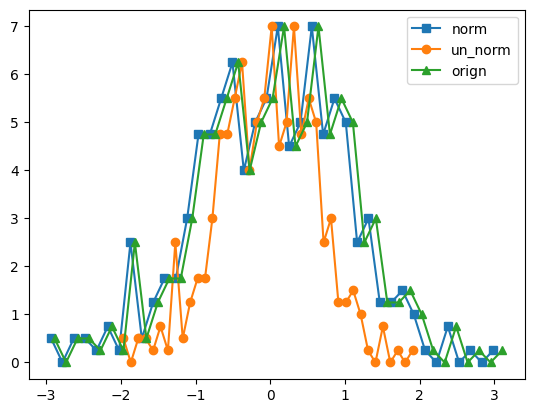

In [83]:
y11,x11 = np.histogram(data1,40)
xx11 = (x11[0:-1]+x11[1:])/2
y11 = 100*y11/sum(y11)

y1,x1 = np.histogram(dZ1,40)
xx1 = (x1[0:-1]+x1[1:])/2
y1 = 100*y1/sum(y1)

y2,x2 = np.histogram(dMz1,40)
xx2 = (x2[0:-1]+x2[1:])/2
y2 = 100*y2/sum(y2)

plt.plot(xx1,y1,'s-',label='norm')
plt.plot(xx2,y2,'o-',label='un_norm')
plt.plot(xx11,y11,'^-',label='orign')

plt.legend()
plt.show()

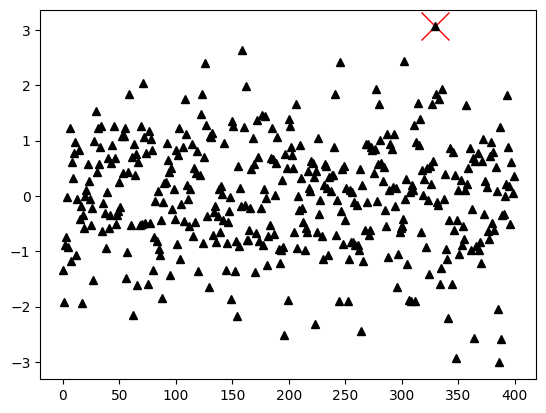

In [71]:
abnormal = np.where(dZ1>3)[0]
if abnormal.size != 0:
    plt.plot(abnormal,dZ1[abnormal],'x',color='r',markersize=20)
plt.plot(dZ1,'k^')

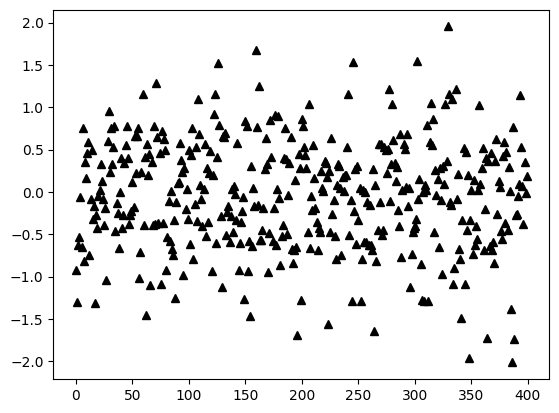

In [72]:
abnormal = np.where(dMz1>3)[0]
if abnormal.size != 0:
    plt.plot(abnormal,dMz1[abnormal],'x',color='r',markersize=20)
plt.plot(dMz1,'k^')

    

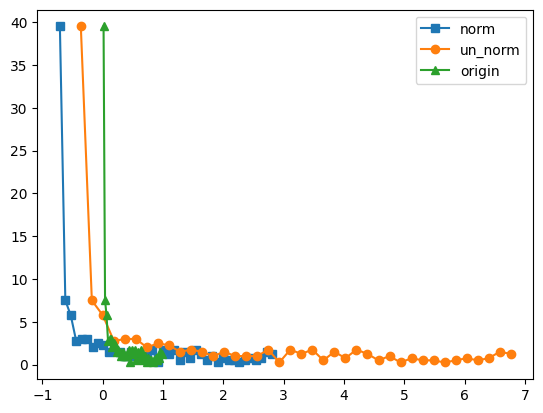

In [84]:
y33,x33 = np.histogram(data2,40)
xx33 = (x33[0:-1]+x33[1:])/2
y33 = 100*y33/sum(y33)

y3,x3 = np.histogram(dZ2,40)
xx3 = (x3[0:-1]+x3[1:])/2
y3 = 100*y3/sum(y3)

y4,x4 = np.histogram(dMz2,40)
xx4 = (x4[0:-1]+x4[1:])/2
y4 = 100*y4/sum(y4)

plt.plot(xx3,y3,'s-',label='norm')
plt.plot(xx4,y4,'o-',label='un_norm')
plt.plot(xx33,y33,'^-',label='origin')

plt.legend()
plt.show()

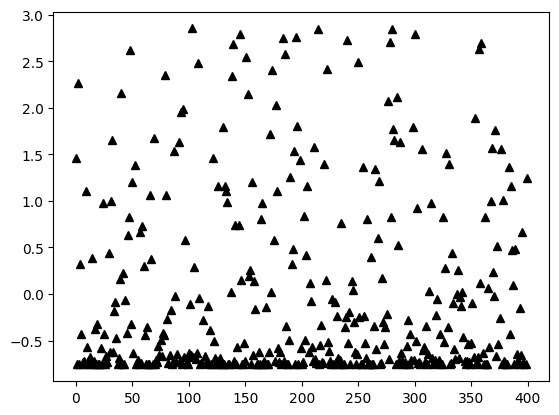

In [73]:
abnormal = np.where(dZ2>3)[0]
if abnormal.size != 0:
    plt.plot(abnormal,dZ2[abnormal],'x',color='r',markersize=20)
plt.plot(dZ2,'k^')

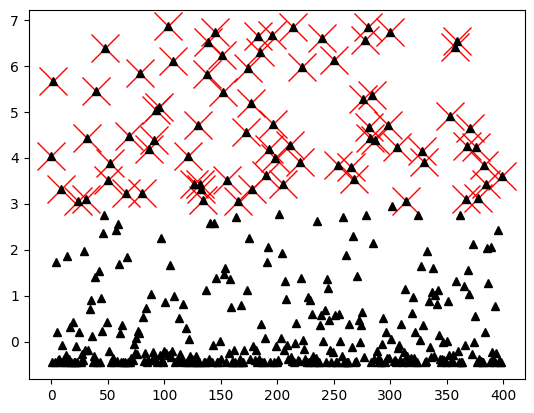

In [74]:
abnormal = np.where(dMz2>3)[0]
if abnormal.size != 0:
    plt.plot(abnormal,dMz2[abnormal],'x',color='r',markersize=20)
plt.plot(dMz2,'k^')
